# A Neural Network Exploration with MNIST Dataset

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from tensorflow import set_random_seed
set_random_seed(2)

import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
df_train = pd.read_csv('/Users/kirabreeden/Desktop/Grad_School/Northwestern_MSDS/Sping_2020/MSDS_422/Homeworks/HW_5/digit_train.csv')

df_test = pd.read_csv('/Users/kirabreeden/Desktop/Grad_School/Northwestern_MSDS/Sping_2020/MSDS_422/Homeworks/HW_5/digit_test.csv')

In [3]:
#we separate our images from our labels
X = np.array(df_train.drop(['label'], 1))
y = np.array(df_train['label'])

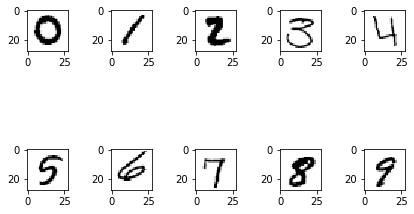

In [4]:
#we will grab one of each type of label just to see what it looks like
nums = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
idxs = []
i = 0
while nums: 
    if y[i] in nums:
        idxs.append((i, y[i]))
        nums.remove(y[i])
    i = i + 1

#let's sort these labels in ascending order for later clarity
idxs.sort(key=lambda x:x[1])
 
#Let's print out all the digits we found with the different labels.    
fig, axes = plt.subplots(2, 5) 
fig.tight_layout()
axes = axes.reshape(-1)
k = 0
for j in idxs: 
    some_digit = X[j[:1]]
    some_digit_image = some_digit.reshape(28, 28)
    axes[k].imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    k = k + 1

plt.show()    
    

In [5]:
X.shape

(42000, 784)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# Using Keras

In [7]:
# Let's scale our data (train and test) using Min Max Scaler
scaler = MinMaxScaler()
X_train_trans = scaler.fit_transform(X_train) 
X_train_trans = np.array(X_train_trans)
X_test_trans = scaler.fit_transform(X_test)
X_test_trans = np.array(X_test_trans)

In [8]:
# Let's make sure that we recognize our labels as categorical data 
y_train_keras = tf.keras.utils.to_categorical(y_train, 10)
y_test_keras = tf.keras.utils.to_categorical(y_test, 10)

In [9]:
model = tf.keras.Sequential() 

model.add(layers.Dense(392, input_dim=784, activation = 'relu')) #input layer 1
model.add(layers.Dense(392, activation = 'relu')) #hidden layer 1 
model.add(layers.Dense(392, activation = 'relu')) #hidden layer 2
#model.add(layers.Dense(392, activation = 'relu')) #hidden layer 3
model.add(layers.Dense(10, activation = 'softmax')) #this is our output layer

# we choose categorical crossentropy and accuracy because we did the one-hot categorical transformation above
model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

start=datetime.now()
mod = model.fit(X_train_trans, y_train_keras, epochs = 15, validation_data = (X_test_trans, y_test_keras))
end=datetime.now()
print("Run time: ", end-start)


Train on 33600 samples, validate on 8400 samples
Epoch 1/15
33600/33600 [==============================] - 4s 116us/sample - loss: 0.2423 - categorical_accuracy: 0.9253 - val_loss: 0.1256 - val_categorical_accuracy: 0.9630
Epoch 2/15
33600/33600 [==============================] - 4s 113us/sample - loss: 0.1034 - categorical_accuracy: 0.9678 - val_loss: 0.1091 - val_categorical_accuracy: 0.9681
Epoch 3/15
33600/33600 [==============================] - 4s 111us/sample - loss: 0.0752 - categorical_accuracy: 0.9767 - val_loss: 0.1036 - val_categorical_accuracy: 0.9699
Epoch 4/15
33600/33600 [==============================] - 4s 110us/sample - loss: 0.0600 - categorical_accuracy: 0.9813 - val_loss: 0.0871 - val_categorical_accuracy: 0.9765
Epoch 5/15
33600/33600 [==============================] - 4s 108us/sample - loss: 0.0475 - categorical_accuracy: 0.9850 - val_loss: 0.1731 - val_categorical_accuracy: 0.9601
Epoch 6/15
33600/33600 [==============================] - 4s 108us/sample - loss:

In [10]:
#Here we go ahead and check the error of our model
pred = model.predict(X_test_trans)
pred = pred.astype(int)
delta = abs(pred-y_test_keras.astype(int))
bynum = sum(delta)
tot = sum(bynum)
print("Total Error: ", tot/(10000*10))

Total Error:  0.03186


In [11]:
#This is use scaling and running our DNN on the kaggle test set
X_test_kaggle = np.array(df_test)
X_predict = scaler.fit_transform(X_test_kaggle) 
y_pred = model.predict(X_predict)

In [12]:
#Now we have to decode the one-hot coding output so that we get the proper format for the kaggle competition
y_use = []

for i in range(y_pred.shape[0]): 
    datum = y_pred[i]
    decoded = np.argmax(datum)
    y_use.append(decoded)
      

In [13]:
#set up the kaggle submission file
submission_id = np.array(df_test.index.values)
submission_id = submission_id + 1
submission_set = np.column_stack((submission_id,y_use))
#np.savetxt('Breeden_Sub6.csv', submission_set, delimiter=',', fmt='%d')

## Using manual TensorFlow

In [14]:
results = pd.DataFrame({"Number of Layers":[4,5,3,4,4,5, 4, 4], "Nodes per Layer (except last layer)":[392,392,392,400, 350, 30, 30, 392], "Number of Epochs": [30, 30, 30, 30, 30, 30, 30, 15], "Processing Time":["01:48.837591","02:19.435032","01:32.300355", "01:57.118684", "01:38.126440", "00:48.999417", "00:48.788135", "00:56.652412"], "Training Set Accuracy":[0.9964,0.9977 ,0.9985, 0.9973, 0.9979, 0.9935, 0.9948, 0.9951], "Test Set Accuracy":[0.9777,0.9782,0.9690, 0.9711, 0.9799, 0.9645, 0.9625, 0.9786], "Kaggle Score":[0.97557,0.97642,"not submitted", "not submitted", 0.97642, "not submitted", "not submitted", "0.97800"]})
results

,Number of Layers,Nodes per Layer (except last layer),Number of Epochs,Processing Time,Training Set Accuracy,Test Set Accuracy,Kaggle Score
0,4,392,30,01:48.837591,0.9964,0.9777,0.97557
1,5,392,30,02:19.435032,0.9977,0.9782,0.97642
2,3,392,30,01:32.300355,0.9985,0.9690,not submitted
3,4,400,30,01:57.118684,0.9973,0.9711,not submitted
4,4,350,30,01:38.126440,0.9979,0.9799,0.97642
5,5,30,30,00:48.999417,0.9935,0.9645,not submitted
6,4,30,30,00:48.788135,0.9948,0.9625,not submitted
7,4,392,15,00:56.652412,0.9951,0.9786,0.97800


As shown above in the table and below in the screen shot from kaggle, though we did run our model with quite a few different variations of layers, nodes, etc, I chose to only submit the higher performing models to kaggle. 

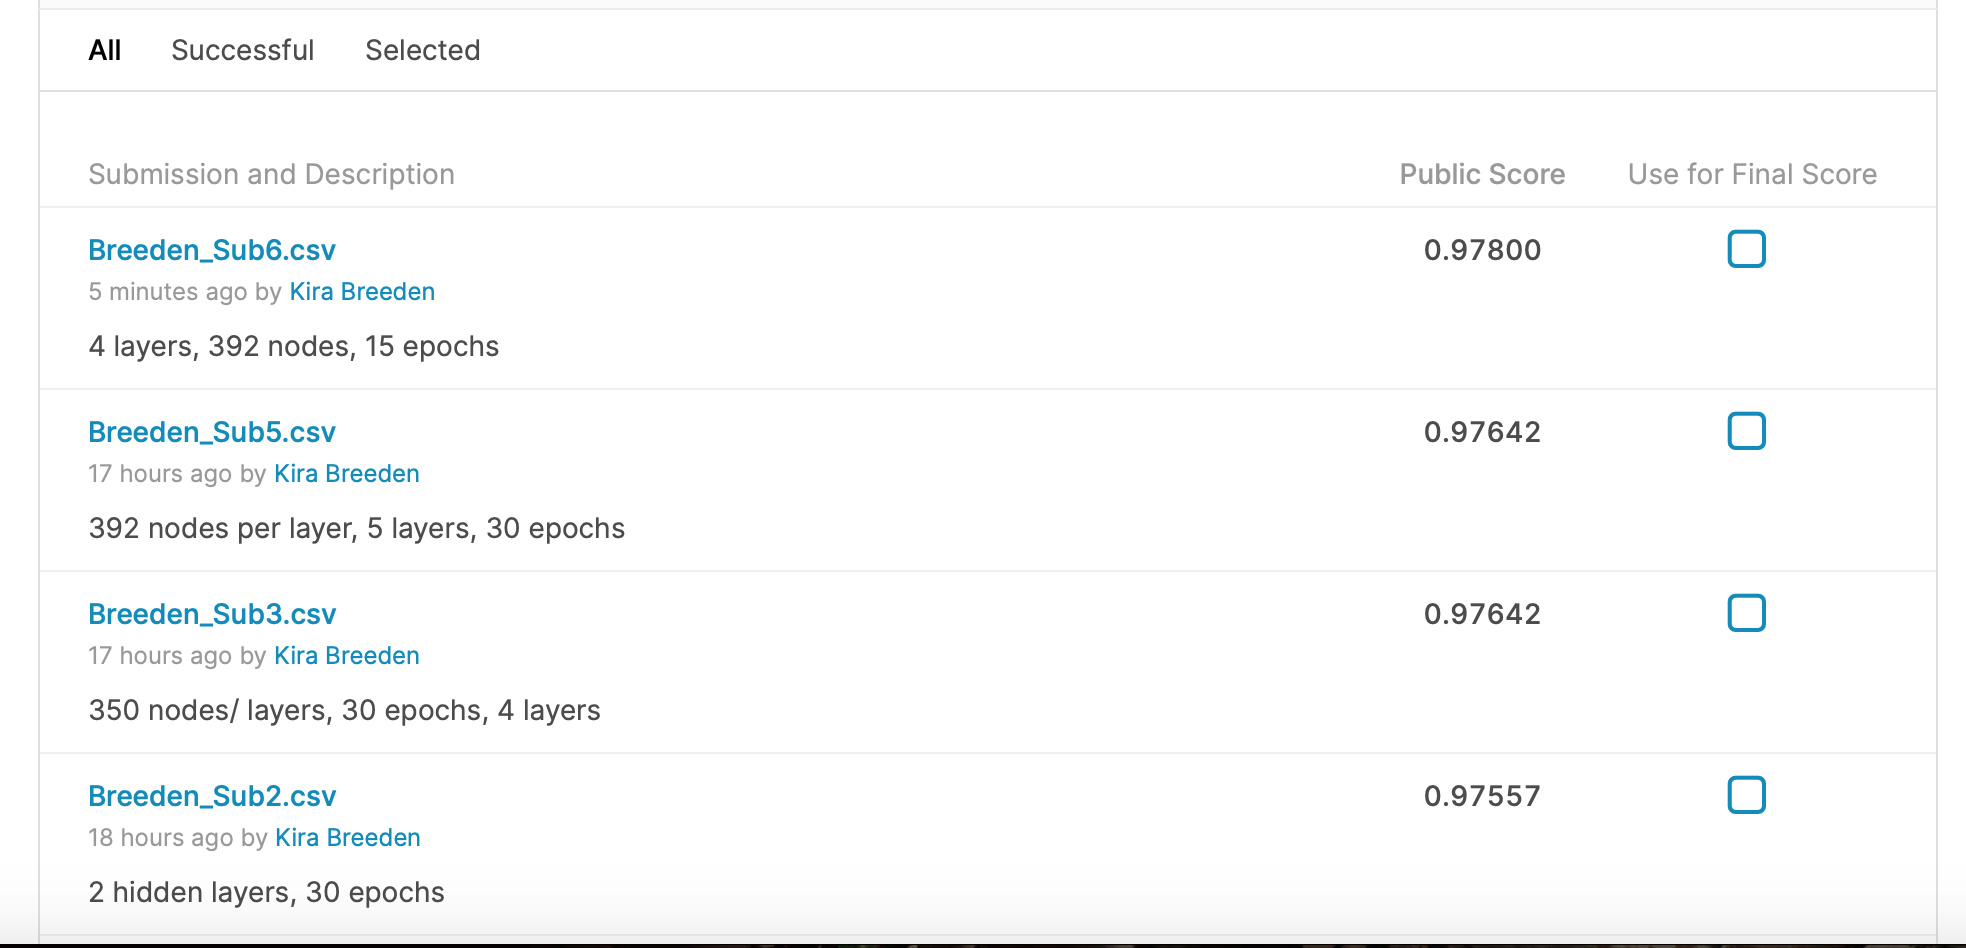

# Management Question
Suppose you are a financial institution evaluating machine learning technologies for optical character recognition. Initial testing is on the MNIST digits. What can you conclude from your benchmark study? Which neural network typology and hyperparameter settings would you recommend as being the most trustworthy?

Given the exploratorty benchmark study I outlined above, I would recommend about 4 layers with 392 nodes per layer (except of course the last layer where we need 10 nodes because we want 10 outputs) and about 15 - 30 epochs. 

In some cases, depending on how many epochs we wish to use and how many layers we wish to use, our computational time with go up (basically the more layers the model must go through and the more times it must re-run through the layers, the longer it will take). Using 15 epochs we have found a bit of a sweet spot where our computation time is short but our performance is still pretty high. We can also see that our performance is almost the same at about 30 epochs, meaning that our performance must level off somewhat quickly. 

Additionally we use the hyperparameters of the "relu" activation function and the dense connections for our neurons. We choose the relu function in particular because for our classification model where the labels we are using are one-hot converted categorical labels, we choose to use a linear function. 